In [ ]:
# 1.Analyse and process the Data  in such a way that it will be ready to do some predictions or train 
# some machine learning model 

In [1]:
import findspark 
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("ProjectApp").getOrCreate()

In [3]:
spark

In [4]:
df=spark.read.option("header","true").csv('D:\\zoo.csv',inferSchema=True)
df.show()

+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+
|animal_name|hair|feathers|eggs|milk|airborne|aquatic|predator|toothed|backbone|breathes|venomous|fins|legs|tail|domestic|catsize|class_type|
+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+
|   aardvark|   1|       0|   0|   1|       0|      0|       1|      1|       1|       1|       0|   0|   4|   0|       0|      1|         1|
|   antelope|   1|       0|   0|   1|       0|      0|       0|      1|       1|       1|       0|   0|   4|   1|       0|      1|         1|
|       bass|   0|       0|   1|   0|       0|      1|       1|      1|       1|       0|       0|   1|   0|   1|       0|      0|         4|
|       bear|   1|       0|   0|   1|       0|      0|       1|      1|       1|       1|       0|   0|   4|   0|       0|      1|         1|
|     

In [5]:
df.printSchema()

root
 |-- animal_name: string (nullable = true)
 |-- hair: integer (nullable = true)
 |-- feathers: integer (nullable = true)
 |-- eggs: integer (nullable = true)
 |-- milk: integer (nullable = true)
 |-- airborne: integer (nullable = true)
 |-- aquatic: integer (nullable = true)
 |-- predator: integer (nullable = true)
 |-- toothed: integer (nullable = true)
 |-- backbone: integer (nullable = true)
 |-- breathes: integer (nullable = true)
 |-- venomous: integer (nullable = true)
 |-- fins: integer (nullable = true)
 |-- legs: integer (nullable = true)
 |-- tail: integer (nullable = true)
 |-- domestic: integer (nullable = true)
 |-- catsize: integer (nullable = true)
 |-- class_type: integer (nullable = true)



In [6]:
df.count()

101

In [7]:
df1=df.na.drop(how="any")
df1

DataFrame[animal_name: string, hair: int, feathers: int, eggs: int, milk: int, airborne: int, aquatic: int, predator: int, toothed: int, backbone: int, breathes: int, venomous: int, fins: int, legs: int, tail: int, domestic: int, catsize: int, class_type: int]

In [8]:
df1.count()

101

In [9]:
# 2.Make a ML Model which will be able to predict the category of animal based on the features you provide. 
# Check the performance matrix of the Model.

In [19]:
df.select('class_type').distinct().show()

+----------+
|class_type|
+----------+
|         1|
|         6|
|         3|
|         5|
|         4|
|         7|
|         2|
+----------+



In [11]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

In [20]:
df.columns[1:]

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [21]:
va=VectorAssembler(inputCols=df.columns[1:],outputCol='Input Features')
indexer=StringIndexer(inputCol='class_type',outputCol='class_type_Data')
df1=indexer.fit(df).transform(df)
df2=va.transform(df1)
df2.show()

+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+---------------+--------------------+
|animal_name|hair|feathers|eggs|milk|airborne|aquatic|predator|toothed|backbone|breathes|venomous|fins|legs|tail|domestic|catsize|class_type|class_type_Data|      Input Features|
+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+---------------+--------------------+
|   aardvark|   1|       0|   0|   1|       0|      0|       1|      1|       1|       1|       0|   0|   4|   0|       0|      1|         1|            0.0|(17,[0,3,6,7,8,9,...|
|   antelope|   1|       0|   0|   1|       0|      0|       0|      1|       1|       1|       0|   0|   4|   1|       0|      1|         1|            0.0|(17,[0,3,7,8,9,12...|
|       bass|   0|       0|   1|   0|       0|      1|       1|      1|       1|       0|       0|   1|  

In [22]:
finaldata=df2.select('Input Features','class_type_Data')
finaldata.show()

+--------------------+---------------+
|      Input Features|class_type_Data|
+--------------------+---------------+
|(17,[0,3,6,7,8,9,...|            0.0|
|(17,[0,3,7,8,9,12...|            0.0|
|(17,[2,5,6,7,8,11...|            2.0|
|(17,[0,3,6,7,8,9,...|            0.0|
|(17,[0,3,6,7,8,9,...|            0.0|
|(17,[0,3,7,8,9,12...|            0.0|
|(17,[0,3,7,8,9,12...|            0.0|
|(17,[2,5,7,8,11,1...|            2.0|
|(17,[2,5,6,7,8,11...|            2.0|
|(17,[0,3,7,8,9,12...|            0.0|
|(17,[0,3,6,7,8,9,...|            0.0|
|(17,[1,2,4,8,9,12...|            1.0|
|(17,[2,5,6,7,8,11...|            2.0|
|(17,[2,6,16],[1.0...|            3.0|
|(17,[2,5,6,12,16]...|            3.0|
|(17,[2,5,6,12,16]...|            3.0|
|(17,[1,2,4,6,8,9,...|            1.0|
|(17,[0,3,7,8,9,12...|            0.0|
|(17,[2,5,6,7,8,11...|            2.0|
|(17,[3,5,6,7,8,9,...|            0.0|
+--------------------+---------------+
only showing top 20 rows



In [23]:
train,test=finaldata.randomSplit([.70,.30])

In [24]:
from pyspark.ml.classification import DecisionTreeClassifier
dtcmodel=DecisionTreeClassifier(labelCol='class_type_Data',featuresCol='Input Features')
model=dtcmodel.fit(train)
model

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_7016447f62aa, depth=5, numNodes=11, numClasses=7, numFeatures=17

In [25]:
prediction_res=model.transform(test)
prediction_res.show()
prediction_res.printSchema()

+--------------------+---------------+--------------------+--------------------+----------+
|      Input Features|class_type_Data|       rawPrediction|         probability|prediction|
+--------------------+---------------+--------------------+--------------------+----------+
|(17,[0,2,4,9,12,1...|            4.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       4.0|
|(17,[0,3,5,6,7,8,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|[25.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|

In [26]:
prediction_res.select('Input Features','class_type_Data','prediction').show()

+--------------------+---------------+----------+
|      Input Features|class_type_Data|prediction|
+--------------------+---------------+----------+
|(17,[0,2,4,9,12,1...|            4.0|       4.0|
|(17,[0,3,5,6,7,8,...|            0.0|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|       0.0|
|(17,[1,2,4,5,6,8,...|            1.0|       1.0|
|(17,[1,2,4,5,8,9,...|            1.0|       1.0|
|(17,[1,2,4,6,8,9,...|            1.0|       1.0|
|(17,[1,2,6,8,9,12...|            1.0|       1.0|
|(17,[2,4,6,9,12,1...|            4.0|       4.0|
|(17,[2,4,9,12,16]...|            4.0|       4.0|


In [27]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator=MulticlassClassificationEvaluator(labelCol='class_type_Data',predictionCol='prediction')
accuracy=evaluator.evaluate(prediction_res)
print("Accuracy of model ",accuracy)
print("Error of model ",(1-accuracy))

Accuracy of model  0.8384415584415585
Error of model  0.16155844155844146


In [28]:
from pyspark.ml.classification import RandomForestClassifier
dtcmodel=RandomForestClassifier(labelCol="class_type_Data",featuresCol="Input Features")
model=dtcmodel.fit(train)

In [29]:
prediction_result=model.transform(test)
prediction_result.show()

+--------------------+---------------+--------------------+--------------------+----------+
|      Input Features|class_type_Data|       rawPrediction|         probability|prediction|
+--------------------+---------------+--------------------+--------------------+----------+
|(17,[0,2,4,9,12,1...|            4.0|[3.0,0.0,0.0,1.83...|[0.15000000000000...|       4.0|
|(17,[0,3,5,6,7,8,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,6,7,8,9,...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|(17,[0,3,7,8,9,12...|            0.0|[20.0,0.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|

In [30]:
evaluator=MulticlassClassificationEvaluator(labelCol="class_type_Data",predictionCol='prediction')
accuracy=evaluator.evaluate(prediction_result)
print("Accurancy",accuracy)
print("Test error model",(1-accuracy))

Accurancy 0.9346320346320347
Test error model 0.0653679653679653


In [31]:
# 3.Using KNN predict how animal categorization can be done. Check categories by using optimized value of k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('D:\\zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:
scaler=StandardScaler()

In [4]:
scaler.fit(df.drop('animal_name',axis=1))

StandardScaler()

In [5]:
sf=scaler.transform(df.drop('animal_name',axis=1))

In [6]:
final_Data=pd.DataFrame(sf,columns=df.columns[:-1])
final_Data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,-0.875451
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,1.514294
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,1.992242


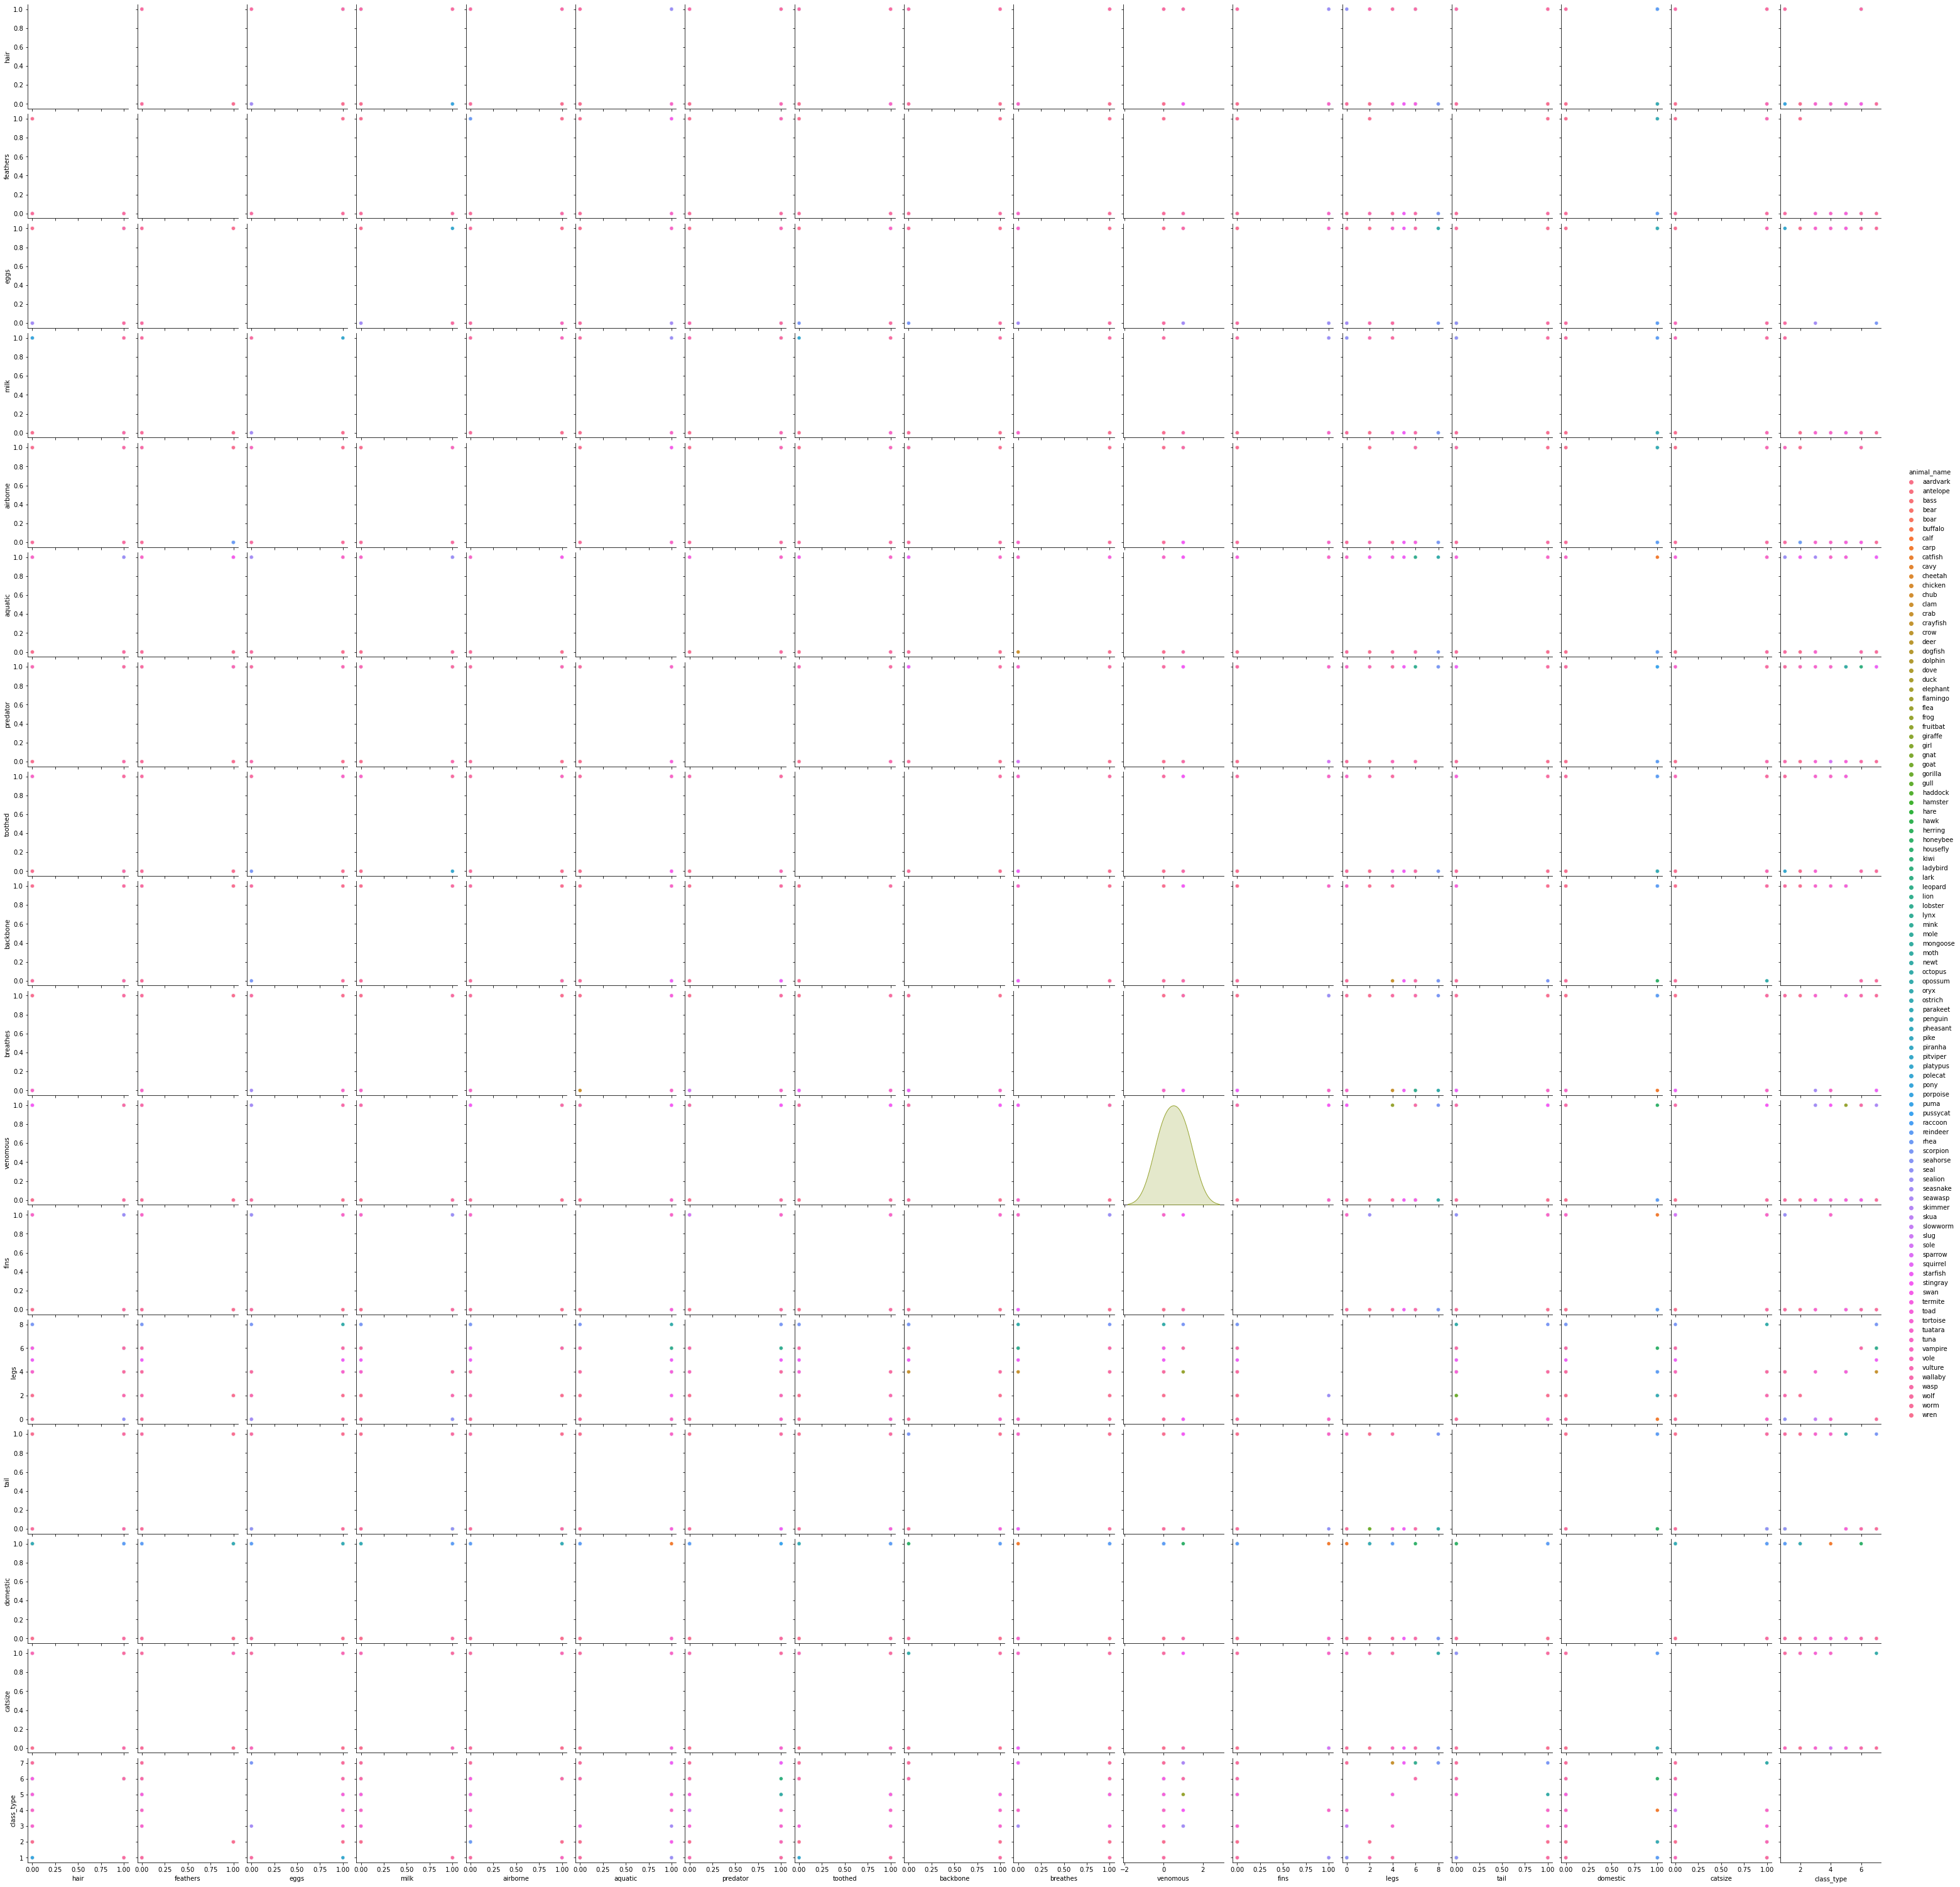

In [7]:
sns.pairplot(df,hue='animal_name')

In [7]:
x_train,x_test,y_train,y_test=train_test_split(sf,df['animal_name'],test_size=0.5)

In [8]:
knn=KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
predictions=knn.predict(x_test)

In [11]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00         1
    antelope       0.00      0.00      0.00         1
        bass       0.00      0.00      0.00         0
        bear       0.00      0.00      0.00         1
        boar       0.00      0.00      0.00         1
     buffalo       0.00      0.00      0.00         0
        calf       0.00      0.00      0.00         1
     catfish       0.00      0.00      0.00         1
        cavy       0.00      0.00      0.00         0
        clam       0.00      0.00      0.00         0
        crab       0.00      0.00      0.00         1
    crayfish       0.00      0.00      0.00         1
        crow       0.00      0.00      0.00         0
        deer       0.00      0.00      0.00         1
     dolphin       0.00      0.00      0.00         1
        duck   

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [12]:
accuracy_rate=[]

for i in range (1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,final_Data,df['animal_name'],cv=2)
    accuracy_rate.append(score.mean())

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklear

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


In [13]:
print(accuracy_rate)

[0.01, 0.01, 0.019803921568627453, 0.019803921568627453, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
error_rate=[]

for i in range (1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,final_Data,df['animal_name'],cv=2)
    error_rate.append(1-score.mean())

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\user\anaconda3\lib\site-packages\sklear

In [15]:
print(error_rate)

[0.99, 0.99, 0.9801960784313726, 0.9801960784313726, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Error Rate')

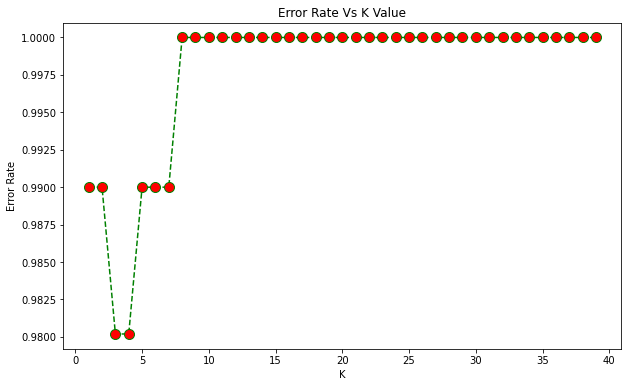

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy Rate')

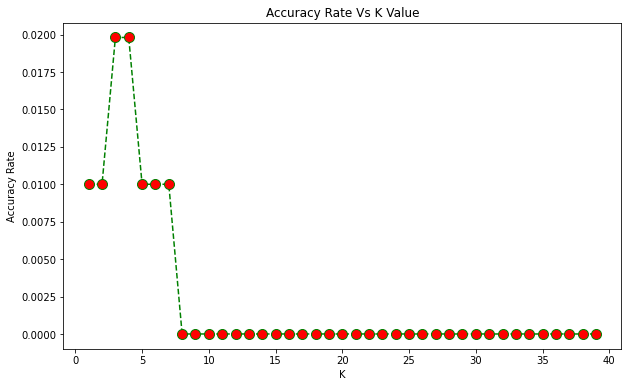

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='green',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')